In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [24]:
df = pd.read_csv(Path('Monarch Watch Tag Recoveries - Central Mexico - mexico-recoveries.csv'))
df.head()

,Tag Code,Report Season,Location
0,775IZ,2020,El Rosario
1,AAAB310,2020,El Rosario
2,AAAE280,2020,Cerro Pelon
3,AAAE401,2020,El Rosario
4,AAAE620,2020,El Rosario


In [8]:
# grouping by month and assuring month isn't an index
counts = df.groupby(["Report Season"]).count()
counts = counts.reset_index()
counts

,Report Season,Tag Code,Location,latitude,longitude,year
0,1993,2,2,2,2,2
1,1994,8,8,8,8,8
2,1995,13,13,13,13,13
3,1996,10,10,10,10,10
4,1997,49,49,49,49,49
5,1998,428,428,428,428,428
6,1999,690,690,690,690,690
7,2000,232,232,232,232,232
8,2001,1936,1936,1936,1936,1936
9,2002,1124,1124,1124,1124,1124


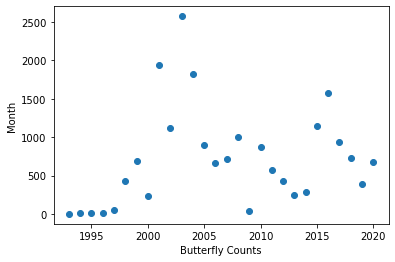

In [11]:
# initial graph. note y-axis with counts.Date is a COUNT of total dates grouped by month; it is not the actual date
plt.scatter(counts["Report Season"], counts.Location)
plt.xlabel('Butterfly Counts')
plt.ylabel('Month')
plt.show()

In [13]:
# using reshape
X = counts["Report Season"].values.reshape(-1, 1)

In [14]:
# setting the y axis as the count of dates
y = counts.Location

In [15]:
# setting the model
model = LinearRegression()

In [16]:
# fitting the model
model.fit(X, y)

LinearRegression()

In [17]:
# number of predictions
y_pred = model.predict(X)
print(y_pred.shape)

(28,)


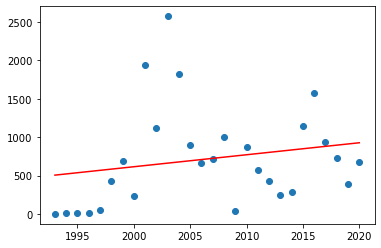

In [18]:
# a straight line for linear regression
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [19]:
# creating a polynomial function that allows us to input degrees for fitting
def fit_and_plot_poly_deg(degree):
    poly_feat = PolynomialFeatures(degree)
    X_poly = poly_feat.fit_transform(X)
    
    print('X_poly shape is: {}'.format(str(X_poly.shape)))

    poly_model = LinearRegression().fit(X_poly, y)
    y_pred = poly_model.predict(X_poly)

    plt.scatter(X, y, zorder=3)
    plt.plot(X, y_pred, color='black');

X_poly shape is: (28, 3)


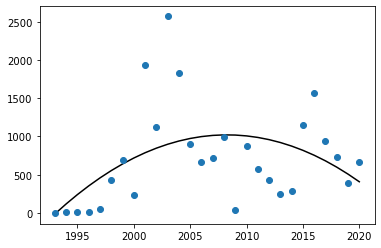

In [20]:
# two degree fit
fit_and_plot_poly_deg(2)

X_poly shape is: (28, 4)


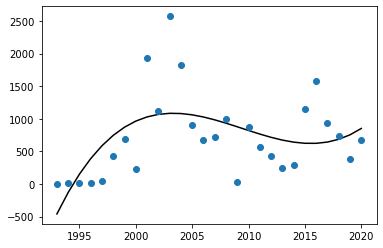

In [21]:
# 3rd degree fit
fit_and_plot_poly_deg(3)

X_poly shape is: (28, 5)


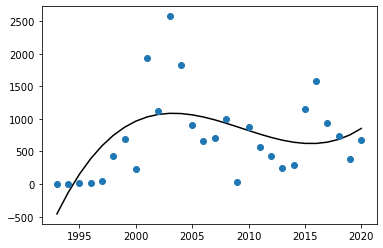

In [22]:
# 4th degree
fit_and_plot_poly_deg(4)